# Microscopy Localization

In [1]:
# import numpy and plot libs
import numpy as np
import genEmitter as gE
import matplotlib.pyplot as plt
import scipy.ndimage as nd


In [36]:
# First generate a set of localizations with a center at position 3,3 (in the python index!)
zn = np.zeros([1000,7,7])
PSFsigma = 1
MeanPhot = 200

for xx in range(0,999):
    tm = gE.genEmitter(MeanPhot,PSFsigma)
    zn[xx,:,:] = tm

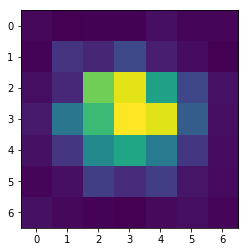

In [37]:
plt.imshow(zn[55])
plt.show()

In [38]:
# script to generate initial parameters for regression
# center of mass of an image with scipy library for x and y estimates
tempIm = zn[0,:,:]
com = nd.center_of_mass(tempIm)
# calculate the minimum and maximum filtered pixel value for bg and I estimates
maxPx = 0;
minPx = 10e5;

# build a Gaussian stencil
stensize = np.asarray(tempIm.shape)
x0,y0 = stensize-1 # Gaussian centers
stensize=stensize*2-1 # guaranteed to always be odd
xX, yY = np.arange(stensize[0]), np.arange(stensize[1])

gx = np.exp(-(xX-x0)**2/(2*PSFsigma**2))
gy = np.exp(-(yY-y0)**2/(2*PSFsigma**2))
g = np.outer(gx, gy)
g /= np.sum(g)  # normalize,

# loop over all elements of ROI
winsize = tempIm.shape
for ii in range(0,winsize[0]):
    for jj in range(0,winsize[1]):
        tempGauss = g[ii:ii+winsize[0],jj:jj+winsize[1]]
        multMap = tempGauss*tempIm
        sumMap = np.sum(multMap)
        maxPx = max(maxPx,sumMap)
        minPx = min(minPx,sumMap)
        
I_0 = maxPx*2*np.pi*PSFsigma**2
bg_0 = minPx
x_0 = com[0]
y_0 = com[0]


# print out results for debugging.
print(x_0,y_0,I_0,bg_0)


3.01171709367 3.01171709367 98.0181709755 0.369625894557


In [ ]:
# write Newton Raphson localization method
# define